# MNIST dataset

Rede neural convolucional para classificar imagens do MNIST dataset

Possui 70.000 imagens de digitos escritos a mão. AS dimensões das imagens são 28x28 em escala de cinza.

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('The MNIST dataset has a training set of %d exemples' % len(X_train))
print('The MNIST dataset has a testing set of %d exemples' % len(X_test))

11493376/11490434 [==============================] - 1s 0us/step
The MNIST dataset has a training set of 60000 exemples
The MNIST dataset has a testing set of 10000 exemples


Visualizando as seis primeiras imagens de treinamento

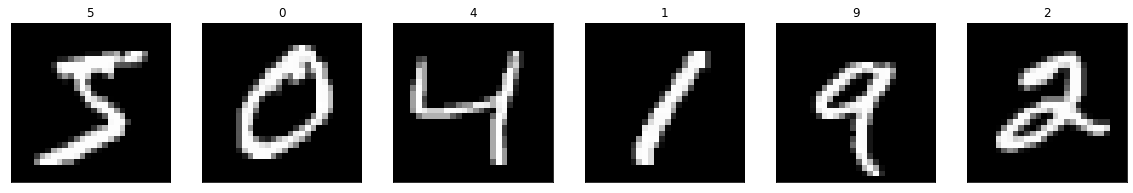

In [2]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

Visualizando a imagem com maior detalhe

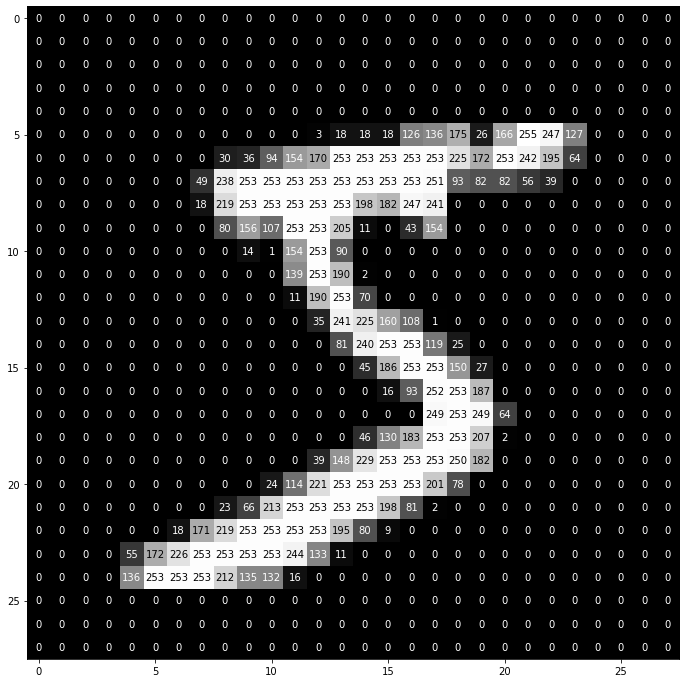

In [9]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max() / 1.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y, x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x][y] < thresh else 'black')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

Pre-processar imagens de entrada: redimensionar as imagens dividindo cada pixel em cada imagem por 255

In [10]:
# Reescala para ter valores entre 0 - 1 -> [0, 255] -> [0, 1]]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255 

print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train sample')
print(X_test.shape[0], 'test sample')

X_train shape:  (60000, 28, 28)
60000 train sample
10000 test sample


Preprocessamento dos labels: Encode Categorical Integer labels using a One-Hot scheme

In [11]:
from keras.utils import np_utils

num_classes = 10
print('Integer-valued labels: ')
print(y_train[:10])

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print('One-hot labels: ')
print(y_train[:10])

Integer-valued labels: 
[5 0 4 1 9 2 1 3 1 4]
One-hot labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Reshpe data to fit our CNN (and input_shape)

In [14]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

In [15]:
print('input_shape: ', input_shape)
print('X_train shape', X_train.shape)

input_shape:  (28, 28, 1)
X_train shape (60000, 28, 28, 1)


Define the model architeture

* filters: o número de filtros

* kernel_size: Número que especifica a altura e a largura da janela de convolução

* strides: O strides da convolução. Se você não especificar nada, strides será definido como 1.

* padding: 'valid' ou 'same'. Se você não especificar nada, o padding será definido como valid.

* activiation: Normalmente 'relu'. Se você não especificar nada, nenhuma ativação será aplicada. Fortemente recomendado adicionar uma função de ativação ReLu a cada camada convolucional da rede.



In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# build the model object
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))

#POOL_1: downsample the image to choose the best feature
model.add(MaxPooling2D(pool_size=(2, 2)))

#CONV_2: here we increase the depth to 64
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since to many dimensions, we only want a classfication output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

Compile the model

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Train the model

In [20]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weigth.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=32, epochs=12, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/12

Epoch 00001: val_loss improved from inf to 0.04467, saving model to model.weigth.best.hdf5
1875/1875 - 31s - loss: 0.1345 - accuracy: 0.9586 - val_loss: 0.0447 - val_accuracy: 0.9849
Epoch 2/12

Epoch 00002: val_loss improved from 0.04467 to 0.03037, saving model to model.weigth.best.hdf5
1875/1875 - 30s - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0304 - val_accuracy: 0.9906
Epoch 3/12

Epoch 00003: val_loss did not improve from 0.03037
1875/1875 - 29s - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 4/12

Epoch 00004: val_loss improved from 0.03037 to 0.02712, saving model to model.weigth.best.hdf5
1875/1875 - 29s - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0271 - val_accuracy: 0.9921
Epoch 5/12

Epoch 00005: val_loss did not improve from 0.02712
1875/1875 - 28s - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.0296 - val_accuracy: 0.9913
Epoch 6/12

Epoch 00006: val_loss did not improve from 0.02712
1875/1875 - 28s - loss: 0.0165 - a

Load the model with the Best Classification accuracy on the validation set

In [22]:
# load the weigths that yielded the best validation accuracy
model.load_weights('model.weigth.best.hdf5')

Calculate the classification accuracy on the test set

In [24]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.2100%
